# Homework 3
## Exercise 3 - Simulate a pandemic with vaccination
Pierluigi Compagnone 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import networkx as nx 
from utility import *

Using the method developed in the previous section, generate a random graph $G=(V,E)$ ,with $|V|=500$ nodes. The average degree should be $k=6$.

In [2]:
k = 6
n_nodes = 500

# Starting point Graph 
G = nx.generators.classic.complete_graph(k + 1)

# Preferential attachement
for nt in range(k+1, n_nodes):
    
    w = np.array(G.degree)[:,1]
    prob = w / np.sum(w) 
    c = (k + (nt % 2)) // 2

    idx = np.random.choice(G.nodes(), size =c, replace=False, p =prob)
    G.add_node(nt)
    
    for link in range(c):
        G.add_edge( nt, idx[link]) 

np.mean(np.array(G.degree)[:,1])

6.0

Let $β=0.3$ and $ρ = 0.7$. With one week being one unit of time, simulate the epidemic with vaccination for $15$ weeks, using the vaccination scheme $Vacc(t)$ above. You can choose an initial configuration with 10 infected nodes selected at random from the node set V, or make a different choice of initial configuration (in the latter case, please briefly discuss your motivation).

In [3]:
# Initialization
vax =  [0, 5, 15, 25, 35, 45, 55, 60, 60, 60, 60, 60, 60, 60, 60]
beta = 0.3
ro = 0.7
n_steps = 100
n_weeks = 15
initial_infected = 10
n_stati = 4
policy = "random"

simu= np.zeros([n_steps,n_weeks, n_nodes])

# Simulation loop
for _ in range(0,n_steps):
    print("# Simulation ",_)
    
    states = np.zeros([n_weeks, n_nodes])
    
    # Initial condition 
    x0 = set_init_config(G, initial_infected, policy)
    states[0] = x0
    
    # Single simulation loop
    for i in range(1,n_weeks):
        
        # Vaccination step
        perc = vax[i] - vax[i-1]
        vax_state = vaccination(perc, np.copy(states[i-1]), n_nodes)
        
        # Take last configuration
        x = np.copy( vax_state )
            
        rates = new_conf_rates(G, x, beta, ro, n_stati)
        
        # Chose the next configuration 
        next_pos = np.argmax(np.cumsum(rates,axis=1) > np.random.rand(n_nodes,1), axis=1)
        states[i] = next_pos
        
    simu[_] = states

# Simulation  0
# Simulation  1
# Simulation  2
# Simulation  3
# Simulation  4
# Simulation  5
# Simulation  6
# Simulation  7
# Simulation  8
# Simulation  9
# Simulation  10
# Simulation  11
# Simulation  12
# Simulation  13
# Simulation  14
# Simulation  15
# Simulation  16
# Simulation  17
# Simulation  18
# Simulation  19
# Simulation  20
# Simulation  21
# Simulation  22
# Simulation  23
# Simulation  24
# Simulation  25
# Simulation  26
# Simulation  27
# Simulation  28
# Simulation  29
# Simulation  30
# Simulation  31
# Simulation  32
# Simulation  33
# Simulation  34
# Simulation  35
# Simulation  36
# Simulation  37
# Simulation  38
# Simulation  39
# Simulation  40
# Simulation  41
# Simulation  42
# Simulation  43
# Simulation  44
# Simulation  45
# Simulation  46
# Simulation  47
# Simulation  48
# Simulation  49
# Simulation  50
# Simulation  51
# Simulation  52
# Simulation  53
# Simulation  54
# Simulation  55
# Simulation  56
# Simulation  57
# Simulation  58
# Simul

In [4]:
# To visulize the pandemic evolution over the weeks 
# (Just for small graphs)
#graph_evolution(G, states, n_stati)

- The average number of newly infected and newly vaccinated individuals each week.

Average new infected per week: [9.930e+00 1.544e+01 4.223e+01 5.442e+01 4.203e+01 2.056e+01 7.420e+00
 2.890e+00 1.350e+00 4.800e-01 2.600e-01 1.400e-01 6.000e-02 2.000e-02
 1.000e-02]
Average new vaccinated per week: [ 0. 25. 50. 50. 50. 50. 50. 25.  0.  0.  0.  0.  0.  0.  0.]


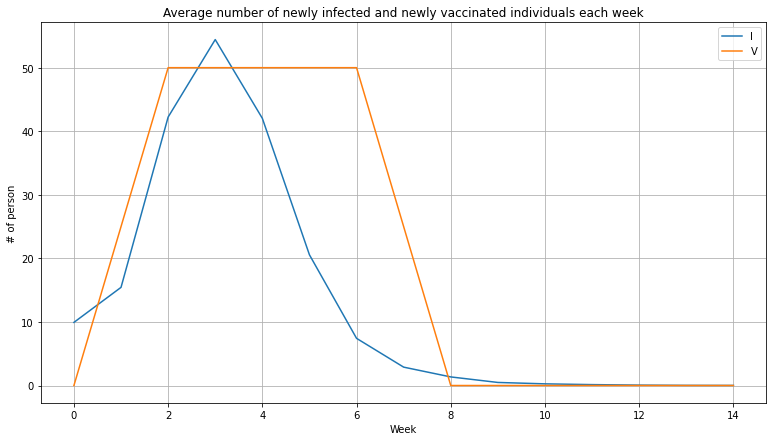

In [5]:
# Compute the average new infected and new vaccinated
simu_week_i = np.zeros([n_steps, n_weeks])
simu_week_v = np.zeros([n_steps, n_weeks])

for i in range( simu.shape[0] ):     
    simu_week_i[i] =  new_weekly( simu[i], 1 ) 
    simu_week_v[i] =  new_weekly( simu[i], 3 ) 
    
avg_week_i = np.mean(simu_week_i ,axis=0)
avg_week_v = np.mean(simu_week_v ,axis=0)

print("Average new infected per week: {}".format(avg_week_i))
print("Average new vaccinated per week: {}".format(avg_week_v))

# Plot the average new infected and new vaccinated per week
plt.figure(figsize = (13 ,7))
plt.plot(range(n_weeks), avg_week_i, label = "I") 
plt.plot(range(n_weeks), avg_week_v, label = "V") 
plt.xlabel("Week")
plt.ylabel("# of person")
plt.title("Average number of newly infected and newly vaccinated individuals each week")
plt.grid()
plt.legend()
#plt.savefig("./images/Ex3_1_{}.png".format(policy))
plt.show()

- The average total number of susceptible, infected, recovered and vaccinated individuals at each week.

Average susceptible per week: [490.07 450.21 360.49 263.46 186.6  137.77 105.28  90.39  89.04  88.56
  88.3   88.16  88.1   88.08  88.07]
Average infected per week: [9.930e+00 1.830e+01 4.696e+01 6.695e+01 5.902e+01 3.542e+01 1.608e+01
 6.920e+00 3.320e+00 1.490e+00 6.600e-01 3.500e-01 1.500e-01 7.000e-02
 2.000e-02]
Average recovered per week: [  0.     6.49  17.55  44.59  79.38 101.81 103.64 102.69 107.64 109.95
 111.04 111.49 111.75 111.85 111.91]
Average vaccinated per week: [  0.  25.  75. 125. 175. 225. 275. 300. 300. 300. 300. 300. 300. 300.
 300.]


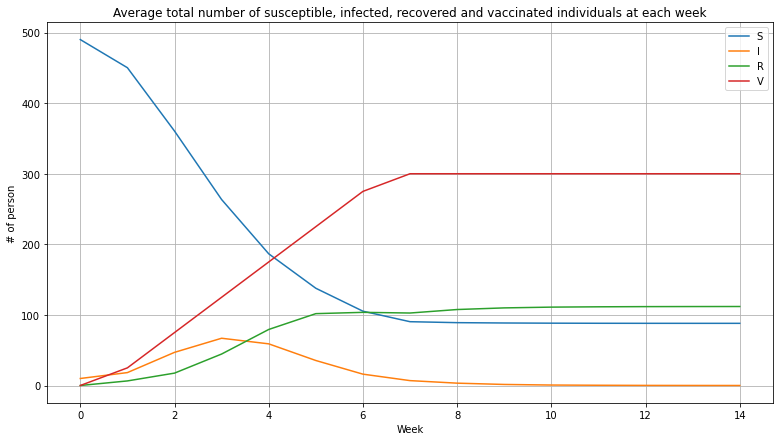

In [6]:
# Compute the average number per state {S,I,R,V} 
sum_sir = np.zeros([n_weeks, n_stati])

for s in simu :
    sum_sir  += count_SIR(s, n_stati)
    
avg_sir = sum_sir / n_steps

print("Average susceptible per week: {}".format(avg_sir[:,0]))
print("Average infected per week: {}".format(avg_sir[:,1]))
print("Average recovered per week: {}".format(avg_sir[:,2]))
print("Average vaccinated per week: {}".format(avg_sir[:,3]))

# Plot the average number per state {S,I,R,V} 
plt.figure(figsize = (13 ,7))
plt.plot(range(n_weeks), avg_sir[:,0], label = "S") 
plt.plot(range(n_weeks), avg_sir[:,1], label = "I") 
plt.plot(range(n_weeks), avg_sir[:,2], label = "R")
plt.plot(range(n_weeks), avg_sir[:,3], label = "V")
plt.xlabel("Week")
plt.ylabel("# of person")
plt.title("Average total number of susceptible, infected, recovered and vaccinated individuals at each week")
plt.legend()
plt.grid()
#plt.savefig("./images/Ex3_2_{}.png".format(policy) )
plt.show()